# Proyecto DS + Lake

# Análisis exploratorio de datos (EDA)

En primera instancia se importan las librerías necesarias para poder evaluar.

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm

Luego se realiza una conexión con Google Drive que es donde se alberga el dataframe Variables Agroclimáticas (df1) que se van a evaluar.

In [ ]:
# Conexión con Google Drive
from google.colab import drive
import os
drive.mount('/content/gdrive/')

# Definiendo el path
path = "/content/gdrive/MyDrive/Data Science - Lake/"

Mounted at /content/gdrive/


**Visualización + Variables agroclimáticas (df1)**

La primera parte del estudio se enfoca en realizar observaciones de los datos para poder intentar comprender su estructura, tamaño del Dataframe y además observar si es que es posible determinar ciertas tendencias para luego conducir tests que permitan verificarlas.

In [ ]:
df1 = pd.read_csv(path+'DF N1 - VA.csv')
df1.head()

,YEAR,DOY,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,T2M_MAX,T2M_MIN,T2M,T2MDEW,T2MWET,RH2M,PRECTOTCORR,QV2M,WS2M,GWETTOP,GWETROOT,GWETPROF
0,1991,1,44.06,172.7,-999.0,34.41,32.62,28.27,12.87,20.20,-2.53,8.83,25.19,0.00,3.78,2.45,0.18,0.59,0.59
1,1991,2,44.01,182.1,-999.0,34.99,34.65,28.75,12.35,20.48,-7.53,6.48,16.31,0.00,2.56,2.43,0.17,0.59,0.59
2,1991,3,43.98,178.8,-999.0,34.84,34.59,29.30,13.76,21.43,-3.12,9.15,20.50,0.00,3.54,2.35,0.17,0.59,0.59
3,1991,4,43.93,183.7,-999.0,34.92,34.96,26.73,14.93,20.52,-0.67,9.93,25.81,0.59,4.33,2.40,0.17,0.59,0.59
4,1991,5,43.89,181.0,-999.0,34.63,34.36,28.40,13.46,21.09,-1.24,9.93,24.62,1.51,4.09,2.38,0.25,0.59,0.59


In [ ]:
df1.shape

(10958, 19)

Es posible observar que se cuenta con un dataframe de 10958 filas y 19 columnas.

In [ ]:
df1.columns

Index(['YEAR', 'DOY', 'TOA_SW_DWN', 'ALLSKY_SFC_PAR_TOT', 'CLRSKY_SFC_PAR_TOT',
       'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DWN', 'T2M_MAX', 'T2M_MIN', 'T2M',
       'T2MDEW', 'T2MWET', 'RH2M', 'PRECTOTCORR', 'QV2M', 'WS2M', 'GWETTOP',
       'GWETROOT', 'GWETPROF'],
      dtype='object')

Las columnas de interés para el cálculo de ET0 son:

Year
Day of year (DOY).
Temperature at 2m maximum (T2M_MAX).
Temperature at 2m minimum (T2M_MIN).
Temperature at 2m (T2M).
Relative humidity al 2m (RH2M).
Wind speed at 2m (WS2M).
Top-of-Atmosphere Shortwave Downward Irradiance (TOA_SW_DWN).
All Sky Surface Shortwave Downward Irradiance (ALLSKY_SFC_SW_DWN).

In [ ]:
df1.describe

<bound method NDFrame.describe of        YEAR  DOY  TOA_SW_DWN  ALLSKY_SFC_PAR_TOT  CLRSKY_SFC_PAR_TOT  \
0      1991    1       44.06              172.70             -999.00   
1      1991    2       44.01              182.10             -999.00   
2      1991    3       43.98              178.80             -999.00   
3      1991    4       43.93              183.70             -999.00   
4      1991    5       43.89              181.00             -999.00   
...     ...  ...         ...                 ...                 ...   
10953  2020  362       44.13              166.27              172.65   
10954  2020  363       44.11              171.41              175.01   
10955  2020  364       44.09              159.10              175.02   
10956  2020  365       44.07              179.05              178.74   
10957  2020  366       44.04              173.35              176.24   

       CLRSKY_SFC_SW_DWN  ALLSKY_SFC_SW_DWN  T2M_MAX  T2M_MIN    T2M  T2MDEW  \
0                  34

Según indica el proveedor de datos, los valores -999.0 corresponden a datos que aún no se han subido al sistema. Normalmente, la información tiene un retraso de hasta 7 días en ser publicada o bien, en los primeros años no se contaba con esa medición.

In [ ]:
df1.dtypes

YEAR                    int64
DOY                     int64
TOA_SW_DWN            float64
ALLSKY_SFC_PAR_TOT    float64
CLRSKY_SFC_PAR_TOT    float64
CLRSKY_SFC_SW_DWN     float64
ALLSKY_SFC_SW_DWN     float64
T2M_MAX               float64
T2M_MIN               float64
T2M                   float64
T2MDEW                float64
T2MWET                float64
RH2M                  float64
PRECTOTCORR           float64
QV2M                  float64
WS2M                  float64
GWETTOP               float64
GWETROOT              float64
GWETPROF              float64
dtype: object

Se observan los tipos de datos relacionados para cada columna.

In [ ]:
df1['DATE'] = pd.to_datetime(df1['YEAR'].astype(str) + df1['DOY'].astype(str), format='%Y%j')

df1.head()

,YEAR,DOY,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,T2M_MAX,T2M_MIN,T2M,T2MDEW,T2MWET,RH2M,PRECTOTCORR,QV2M,WS2M,GWETTOP,GWETROOT,GWETPROF,DATE
0,1991,1,44.06,172.7,-999.0,34.41,32.62,28.27,12.87,20.20,-2.53,8.83,25.19,0.00,3.78,2.45,0.18,0.59,0.59,1991-01-01
1,1991,2,44.01,182.1,-999.0,34.99,34.65,28.75,12.35,20.48,-7.53,6.48,16.31,0.00,2.56,2.43,0.17,0.59,0.59,1991-01-02
2,1991,3,43.98,178.8,-999.0,34.84,34.59,29.30,13.76,21.43,-3.12,9.15,20.50,0.00,3.54,2.35,0.17,0.59,0.59,1991-01-03
3,1991,4,43.93,183.7,-999.0,34.92,34.96,26.73,14.93,20.52,-0.67,9.93,25.81,0.59,4.33,2.40,0.17,0.59,0.59,1991-01-04
4,1991,5,43.89,181.0,-999.0,34.63,34.36,28.40,13.46,21.09,-1.24,9.93,24.62,1.51,4.09,2.38,0.25,0.59,0.59,1991-01-05


Se agrega una columna Date que permita desde las columnas YEAR y DOY (Day of year) hacer análisis temporales mas comprensibles.

In [ ]:
df1.shape

(10958, 20)

---

---

**1. Tº a 2m en el tiempo**

In [ ]:
x = df1['DATE'] # Para el eje x, seleccionamos la fecha
y = df1['T2M'] # Para el eje y, acumulamos las precipitaciones por año
y.head()

0    20.20
1    20.48
2    21.43
3    20.52
4    21.09
Name: T2M, dtype: float64

In [ ]:
x.head()

0   1991-01-01
1   1991-01-02
2   1991-01-03
3   1991-01-04
4   1991-01-05
Name: DATE, dtype: datetime64[ns]

<ipython-input-12-e0cea4a62411>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Temperatura del aire a 2m de 1991 a 2020 (ºC)')

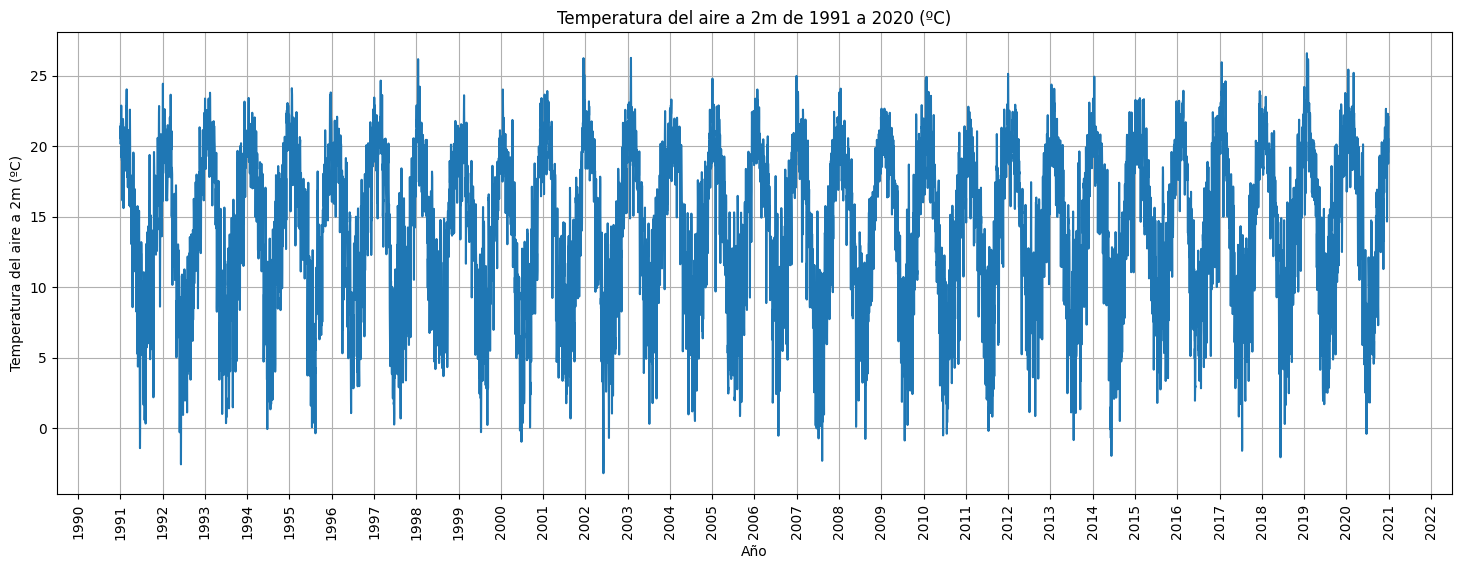

In [ ]:
# Definimos los objetos fig y ax, los cuales contendrán la figura:
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(x, y, label='Temperatura en el tiempo')



date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.YearLocator())




# Etiquetamos los ejes, añadimos un título e insertamos la leyenda:
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.grid()
ax.set_xlabel('Año')
ax.set_ylabel('Temperatura del aire a 2m (ºC)')
ax.set_title('Temperatura del aire a 2m de 1991 a 2020 (ºC)')

Respecto del gráfico anterior es posible evidenciar a la vista que tanto las temperaturas máximas como mínimas han ido presentando un aumento en el tiempo dentro del periodo analizado de 1991 a 2020. Esta información es relevante pues un incremento en la temperatura, corregido con otros factores involucrados, puede suponer un incremento en la evapotranspiración de los cultivos y con ello, un mayor requierimiento de reposición de agua en el suelo para el efectivo desarrollo de los mismos.

En lo que respecta a los ciclos de temperatura, queda pendiente realizar un análisis que permita evidenciar si es que, respecto de las temperaturas, las estaciones se mantienen en igual duración o si es que han ido cambiando en su extensión durante el año con el paso del tiempo.

---

**2. Precipitaciones acumuladas**

In [ ]:
df2 = df1.groupby('YEAR')['PRECTOTCORR'].sum()
# Reiniciar el índice para convertir el resultado en un DataFrame
df2 = df2.reset_index()

# Renombrar la columna sin nombre
df2 = df2.rename(columns={'PRECTOTCORR': 'PTT_Acum'})

df2.head()

,YEAR,PTT_Acum
0,1991,329.54
1,1992,465.47
2,1993,288.17
3,1994,221.60
4,1995,187.11


In [ ]:
x = df2['YEAR'] # Para el eje x, seleccionamos la fecha
y = df2['PTT_Acum']# Para el eje y, acumulamos las precipitaciones por año
y.head()

0    329.54
1    465.47
2    288.17
3    221.60
4    187.11
Name: PTT_Acum, dtype: float64

Text(0.5, 1.0, 'Precipitación acumulada de 1991 a 2020 (mm)')

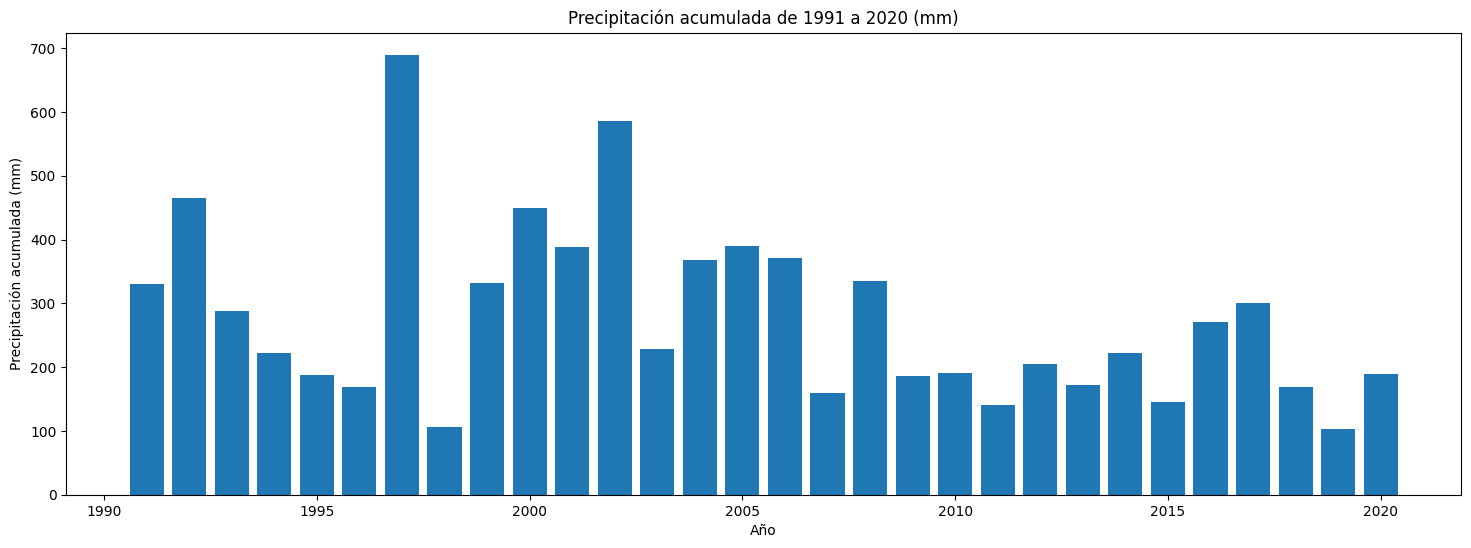

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(x, y)


ax.set_xlabel('Año')
ax.set_ylabel('Precipitación acumulada (mm)')
ax.set_title('Precipitación acumulada de 1991 a 2020 (mm)')

El gráfico de precipitación acumulada en el periodo de estudio que corresponde a 1991-2020 evidencia un decaimiento en las precipitaciones sobre el territorio en cuestión que viene como tendencia sostenida desde el año 2000 a la fecha.

Aún cuando es posible evidenciar en las gráficas tiempos de alta y baja precipitación atribuíbles a los fenómenos del niño y niña respectivamente, falta información para poder verificar si es que estos movimientos en el acumulado corresponder efectivamente a estos fenómenos.

---

**3. Radiación solar**

In [ ]:
df3 = df1.groupby('YEAR')['ALLSKY_SFC_SW_DWN'].mean()
# Reiniciar el índice para convertir el resultado en un DataFrame
df3 = df3.reset_index()

# Renombrar la columna sin nombre
df3 = df3.rename(columns={'ALLSKY_SFC_SW_DWN': 'Rdcn'})

df3.head()

,YEAR,Rdcn
0,1991,19.499068
1,1992,19.397705
2,1993,19.649370
3,1994,20.313863
4,1995,20.573589


In [ ]:
x = df3['YEAR'] # Para el eje x, seleccionamos la fecha
y = df3['Rdcn'] # Para el eje y, acumulamos las precipitaciones por año
y.head()

0    19.499068
1    19.397705
2    19.649370
3    20.313863
4    20.573589
Name: Rdcn, dtype: float64

Text(0.5, 1.0, 'Radiación solar promedio de 1991 a 2020 (MJ∙m^-2∙d^-1)')

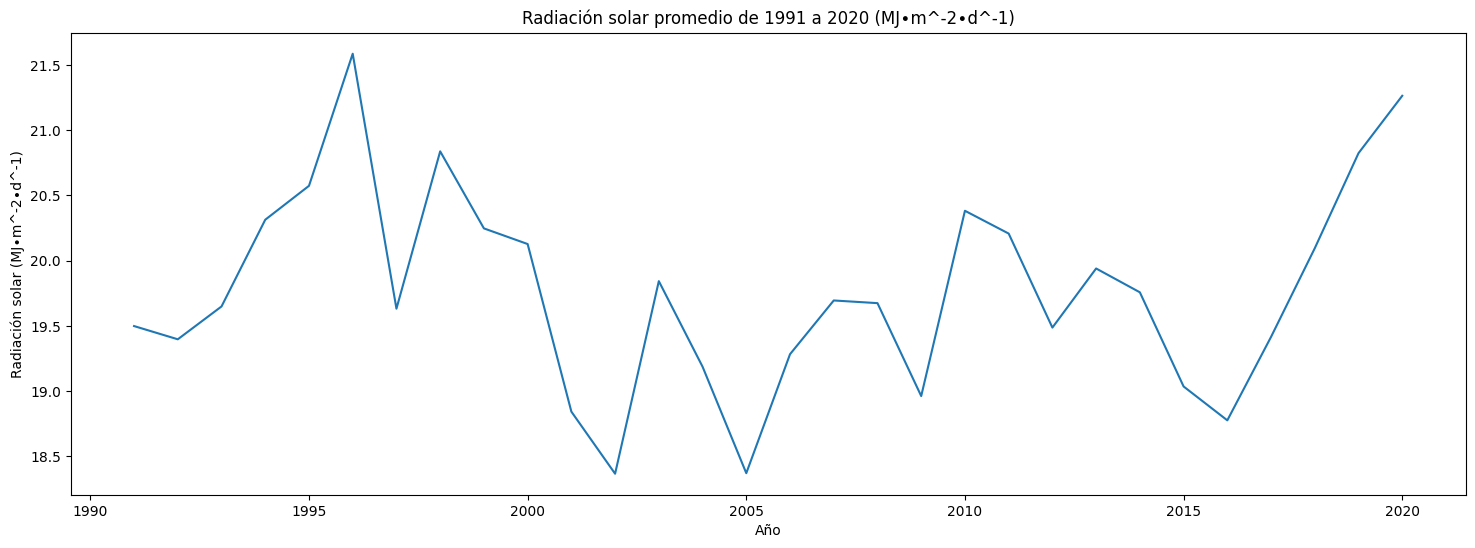

In [ ]:
# Definimos los objetos fig y ax, los cuales contendrán la figura:
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(df3['YEAR'], df3['Rdcn'])

ax.set_xlabel('Año')
ax.set_ylabel('Radiación solar (MJ∙m^-2∙d^-1)')
ax.set_title('Radiación solar promedio de 1991 a 2020 (MJ∙m^-2∙d^-1)')

En lo que se refiere a radiación solar promedio durante el periodo estudiado es muy relevante que aproximadamente desde el año 2016 se ha evidenciado un incremento importante del nivel de radiación que llega a la tierra, lo cual tiene un efecto importante sobre la productividad agrícola y en este contexto sobre la evapotranspiración de los cultivos, siendo que, a mayor radiación incidente hay una mayor liberación de agua desde los cultivos.

---


**4. Análisis de humedad relativa**

Text(0.5, 1.0, 'Humedad relativa (%) periodo 1991 a 2020')

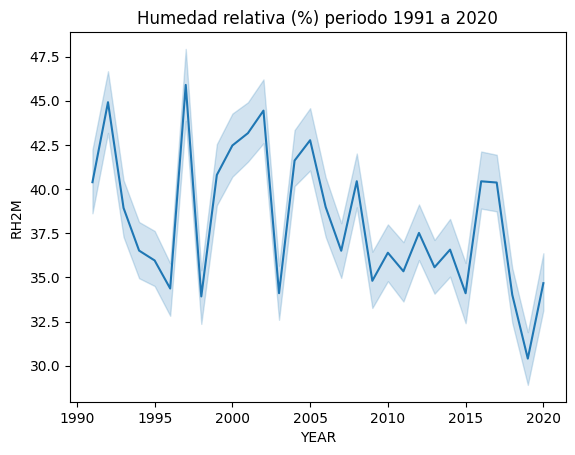

In [ ]:
sns.lineplot(data=df1, x="YEAR", y="RH2M")
plt.title("Humedad relativa (%) periodo 1991 a 2020")

Es posible evidenciar en el gráfico que la humedad relativa del ambiente tiene una tendencia a bajar desde el año 1991 al 2021. Esta situación tiene un impacto directo sobre la evapotranspiración de los cultivos, dado que un ambiente mas seco es un ambiente que extrae mas agua del suelo a travez de las plantas.

---

**5. Velocidad del viento**

Text(0.5, 1.0, 'Velocidad del viento (m/s) periodo 1991 a 2020')

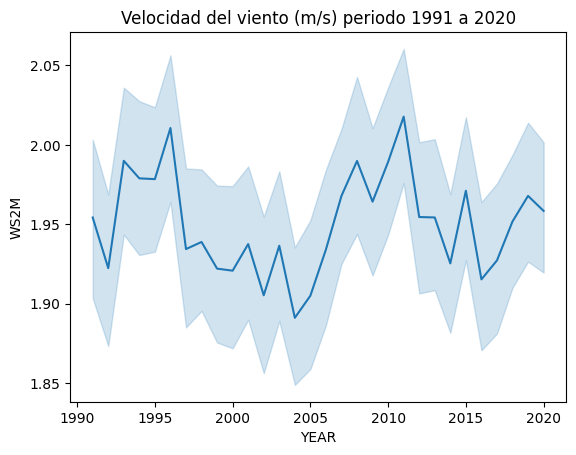

In [ ]:
sns.lineplot(data=df1, x="YEAR", y="WS2M")
plt.title("Velocidad del viento (m/s) periodo 1991 a 2020")

El gráfico muestra la evaluación de la velocidad del viento a 2 metros de altura. Esta variable tiene una implicancia directa sobre la evapotranspiración de los cultivos, ya que una mayor velocidad puede ayudar a extraer mas humedad desde las hojas de las plantas. Según lo que se puede visualizar, hay dos zonas peak arriba y dos zonas peak abajo que podrían también tener una relación con los fenómenos del niño y de la niña para lo cual habría que agregar información al modelo que permita evidenciarlo.

**6. Precipitación v/s Humedad relativa**

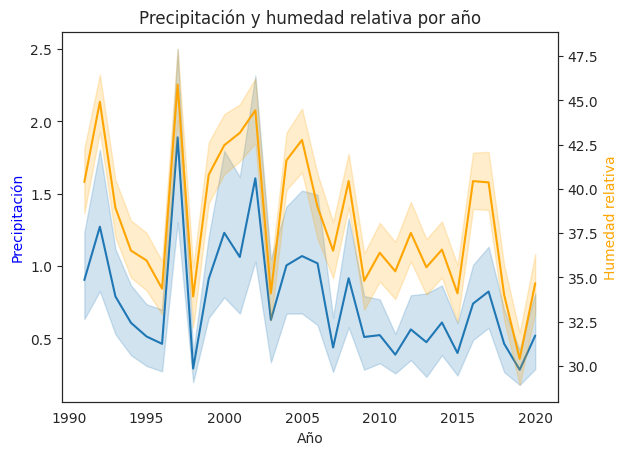

In [ ]:
sns.set_style("white")
ax1 = sns.lineplot(data=df1, x="YEAR", y="PRECTOTCORR")

ax2 = ax1.twinx()


sns.lineplot(data=df1, x="YEAR", y="RH2M", ax=ax2, color='orange')

ax1.set_xlabel('Año')
ax1.set_ylabel('Precipitación', color='blue')
ax2.set_ylabel('Humedad relativa', color='orange')
plt.title('Precipitación y humedad relativa por año')

plt.show()

En este gráfico se busca observar la relación entre las precipitaciones y la humedad relativa del ambiente. Es posible evidenciar un parentezco o correlación que debería ser comprobada con metodologías estadísticas.

Así mismo, sería interesante corroborar que incidencia tiene la humedar relativa sobre la precipitación, es decir, si es que el hecho de que haya una alta humedad relativa propicia las precipitaciones. En caso contrario, también resulta interesante revisar si es que es la humedad relativa dependiente de la precipitación.

Tal y como se pudo evidenciar anteriormente, tanto la humedad relativa como la precipitación muestran una tendencia a la baja.

Finalmente, queda una incognita relacionada a alzas muy bruscas en algunos gráficos en lo que corresponde al año 2021. Se debe realizar una revisión de los datos para verificar que no haya problemas en estos o algún código que haga referencia a datos faltantes.

---

---

**Calculo de ET0 según la fórmula de Penman-Monteith**

In [ ]:
def penman_monteith_et0(row):
    # Constantes
    psychometric_constant = 0.063  # kPa/°C
    latent_heat_of_vaporization = 2.45  # MJ/kg
    seconds_per_day = 86400  # seconds
    conversion_constant = 0.408  # MJ mm^-2 day^-1

    # Extracción de valores por fila
    t_max = row['T2M_MAX']
    t_min = row['T2M_MIN']
    t_mean = row['T2M']
    rh = row['RH2M'] / 100.0  # Convirtiendo porcentaje a fracción
    wind_speed = row['WS2M']
    toa_sw_down = row['TOA_SW_DWN']
    allsky_sfc_sw_down = row['ALLSKY_SFC_SW_DWN']

    # Presión de vapor de saturación (es) y presión real de vapor (ea)
    es_max = 0.6108 * np.exp((17.27 * t_max) / (t_max + 237.3))
    es_min = 0.6108 * np.exp((17.27 * t_min) / (t_min + 237.3))
    es_mean = 0.6108 * np.exp((17.27 * t_mean) / (t_mean + 237.3))
    ea = es_mean * rh

    # Delta (pendiente de la curva de presión de vapor)
    delta = 4098 * es_mean / ((t_mean + 237.3) ** 2)

    # Presión atmosférica (Pa)
    pressure = 101.3 * ((293 - 0.0065 * df1['DATE'].dt.dayofyear) / 293) ** 5.26

    # Constante psicrométrica
    psychrometric_term = psychometric_constant * (1 + 0.34 * wind_speed)

    # Radiación
    radiation_term = (0.408 * delta * (toa_sw_down - (1 - 0.23) * allsky_sfc_sw_down) +
                      psychrometric_term * (900 / (t_mean + 273) * wind_speed * (es_max - es_min) / seconds_per_day))

    # ET0 (mm/día)
    et0_mm_per_day = radiation_term / (delta + psychrometric_term) * conversion_constant

    return et0_mm_per_day

# Agregando la función al DF.
df1['ET0'] = df1.apply(penman_monteith_et0, axis=1)

Mediante el código recién ejecutado es posible realizar el cálculo de la ET0 sobre los datos disponibles en la plataforma NASA Power. Este dato en mm/día nos permite determinar la cantidad de agua que hay que reponer en los cultivos para mantenerlos fuera de estrés.

In [ ]:
df1.head()

,YEAR,DOY,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,T2M_MAX,T2M_MIN,T2M,...,T2MWET,RH2M,PRECTOTCORR,QV2M,WS2M,GWETTOP,GWETROOT,GWETPROF,DATE,ET0
0,1991,1,44.06,172.7,-999.0,34.41,32.62,28.27,12.87,20.20,...,8.83,25.19,0.00,3.78,2.45,0.18,0.59,0.59,1991-01-01,1.762371
1,1991,2,44.01,182.1,-999.0,34.99,34.65,28.75,12.35,20.48,...,6.48,16.31,0.00,2.56,2.43,0.17,0.59,0.59,1991-01-02,1.625673
2,1991,3,43.98,178.8,-999.0,34.84,34.59,29.30,13.76,21.43,...,9.15,20.50,0.00,3.54,2.35,0.17,0.59,0.59,1991-01-03,1.673867
3,1991,4,43.93,183.7,-999.0,34.92,34.96,26.73,14.93,20.52,...,9.93,25.81,0.59,4.33,2.40,0.17,0.59,0.59,1991-01-04,1.601166
4,1991,5,43.89,181.0,-999.0,34.63,34.36,28.40,13.46,21.09,...,9.93,24.62,1.51,4.09,2.38,0.25,0.59,0.59,1991-01-05,1.665365


**ET0 en el tiempo**

Text(0.5, 1.0, 'ET0 (mm/día)) periodo 1991 a 2020')

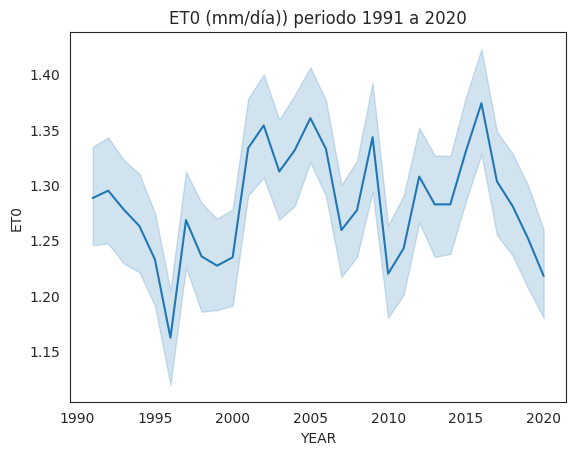

In [ ]:
sns.lineplot(data=df1, x="YEAR", y="ET0")
plt.title("ET0 (mm/día)) periodo 1991 a 2020")

Se realiza un gráfico para visualizar la variabilidad del ET0 durante el tiempo de estudio donde es posible evidenciar que hay una alta variabilidad año a año.

De igual manera, es posible evidenciar que desde el año 2000 al 2020 la evaporación en mayor que en la primera década de datos disponibles.

**ET0 v/s Precipitación**

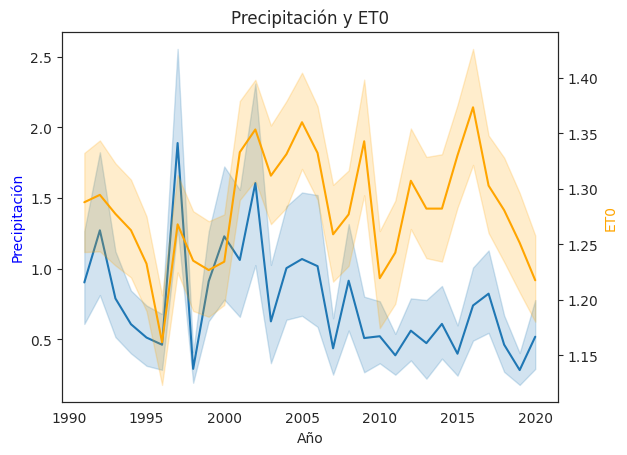

In [ ]:
sns.set_style("white")
ax1 = sns.lineplot(data=df1, x="YEAR", y="PRECTOTCORR")

ax2 = ax1.twinx()


sns.lineplot(data=df1, x="YEAR", y="ET0", ax=ax2, color='orange')

ax1.set_xlabel('Año')
ax1.set_ylabel('Precipitación', color='blue')
ax2.set_ylabel('ET0', color='orange')
plt.title('Precipitación y ET0')

plt.show()

Se realiza un análisis grafico para evidenciar si es que hubiera algún tipo de correlación entre la precipitación y la ET0. Aún cuando gráficamente se hace posible evidenciar ciertas similitudes, se hace importante realizar algún tipo de test para evidenciar la correlación entre ambas variables.

**Boxplot de ET0 para revisar valores atípicos**

<Axes: xlabel='ET0'>

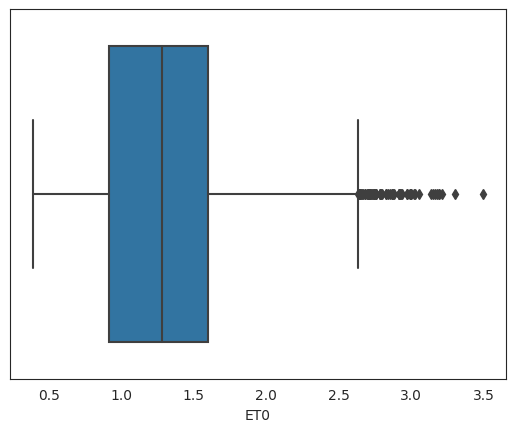

In [ ]:
sns.boxplot(x=df1['ET0'])

Aún cuando es posible evidenciar que hay valores atípicos dentro del estudio, se descarta la posibilidad de hacer una "limpieza" de estos registros, dado que el valor debe ser repuesto mediante el riego y no es posible obviarlo debido a que la reposición de riego es crítica para la productividad.

Distribución de ET0

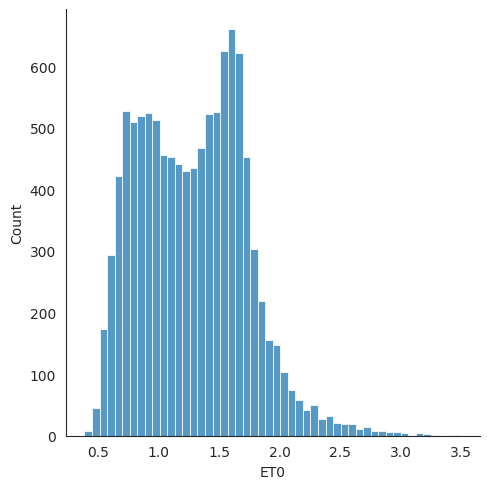

In [ ]:
sns.displot(x=df1['ET0'], bins=50)

Es posible evidenciar y corroborar lo visualizado mediante el bloxplot, donde los valores mas recurrentes de ET0 para la coordenada en estudio están principalmente entre >0.5 y <2 (mm/día)

**Scatter plot de ET0 v/s Precipitación**

<Axes: xlabel='ET0', ylabel='PRECTOTCORR'>

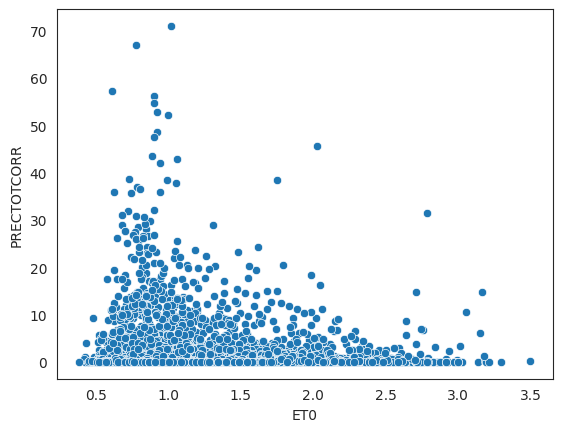

In [ ]:
sns.scatterplot(x=df1.ET0, y=df1.PRECTOTCORR)

Utilizando el Scatterplot es posible evidenciar que a mayor precipitación la ET0 es menor. Esta situación resulta bastante intuitiva al conocer conceptos de riego tales como que las plantas EvapoTranspiran en función de múltiples variables, siendo una de estas la Humedad relativa del ambiente que se ve directamente influenciada cuando hay precipitación.

**Test de correlación ET0 v/s Precipitación**

In [ ]:
 np.corrcoef(df1.ET0, df1.PRECTOTCORR)[0,1]

-0.07898777685216431

Nuestro test de correlación de -0.08 nos demuestra que si bien hay una correlación entre la precipitación y la ET0, al ser tan cercana a cero, resulta ser que la precipitación por si sola no explicaría de manera robusta la ET0.

Es sumamente relevante comprender en este punto que las proyecciones por tanto no se pueden estimar en base a una única variable y que es sumamente escencial el proporcionar todos los campos de la ecuación de Penman-Monteith al modelo para poder hacer algún tipo de predicción.

**Agregando columna Type**

In [ ]:
df1['Type'] = 0
df1.head()

,YEAR,DOY,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,T2M_MAX,T2M_MIN,T2M,...,RH2M,PRECTOTCORR,QV2M,WS2M,GWETTOP,GWETROOT,GWETPROF,DATE,ET0,Type
0,1991,1,44.06,172.7,-999.0,34.41,32.62,28.27,12.87,20.20,...,25.19,0.00,3.78,2.45,0.18,0.59,0.59,1991-01-01,1.762371,0
1,1991,2,44.01,182.1,-999.0,34.99,34.65,28.75,12.35,20.48,...,16.31,0.00,2.56,2.43,0.17,0.59,0.59,1991-01-02,1.625673,0
2,1991,3,43.98,178.8,-999.0,34.84,34.59,29.30,13.76,21.43,...,20.50,0.00,3.54,2.35,0.17,0.59,0.59,1991-01-03,1.673867,0
3,1991,4,43.93,183.7,-999.0,34.92,34.96,26.73,14.93,20.52,...,25.81,0.59,4.33,2.40,0.17,0.59,0.59,1991-01-04,1.601166,0
4,1991,5,43.89,181.0,-999.0,34.63,34.36,28.40,13.46,21.09,...,24.62,1.51,4.09,2.38,0.25,0.59,0.59,1991-01-05,1.665365,0


Se agrega la columna Type donde igual a 0 corresponde a información histórica y 1 corresponderá a información predictiva.

In [ ]:
df1.dtypes

YEAR                           int64
DOY                            int64
TOA_SW_DWN                   float64
ALLSKY_SFC_PAR_TOT           float64
CLRSKY_SFC_PAR_TOT           float64
CLRSKY_SFC_SW_DWN            float64
ALLSKY_SFC_SW_DWN            float64
T2M_MAX                      float64
T2M_MIN                      float64
T2M                          float64
T2MDEW                       float64
T2MWET                       float64
RH2M                         float64
PRECTOTCORR                  float64
QV2M                         float64
WS2M                         float64
GWETTOP                      float64
GWETROOT                     float64
GWETPROF                     float64
DATE                  datetime64[ns]
ET0                          float64
Type                           int64
dtype: object

# Agregando los datos provenientes del pronóstico del clima

Se comienza a trabajar con el proveedor y es posible obtener la predicción de ET0 directamente desde Open-Meteo.

Si bien es posible obtener este parámetro directo desde el proveedor, hay diferentes metodologías para poder calcularlo y la que es de interés para este estudio es la que se obtiene con la formula de Penman-Monteith.

Dado lo anterior, se procede a conectar con el origen de datos y a preparar un data set configurado de la misma manera que el de Nasa Power para poder hacer el cálculo de ET0 mediante la metodología antes mencionada.

In [ ]:
pip install openmeteo-requests


In [ ]:

pip install requests-cache retry-requests numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Configurando API Open-Meteo
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Asegurandose de que todas las variebles estén en la lista
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": -33.0952,
	"longitude": -70.6751,
	"hourly": ["temperature_2m", "relative_humidity_2m", "wind_speed_10m", "shortwave_radiation_instant", "terrestrial_radiation_instant"],
	"timezone": "auto",
	"forecast_days": 16
}
responses = openmeteo.weather_api(url, params=params)

# Procesando la ubicación.Se puede agregar un for-loop para modelos de clima con multiples ubicaciones
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Procesando la data de entrega por hora. Ordenando las variables según la tabla origen de NASA Power.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(2).ValuesAsNumpy()
hourly_shortwave_radiation_instant = hourly.Variables(3).ValuesAsNumpy()
hourly_terrestrial_radiation_instant = hourly.Variables(4).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s"),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s"),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["shortwave_radiation_instant"] = hourly_shortwave_radiation_instant
hourly_data["terrestrial_radiation_instant"] = hourly_terrestrial_radiation_instant

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)


Coordinates -33.125°E -70.75°N
Elevation 730.0 m asl
Timezone b'America/Santiago' b'-03'
Timezone difference to GMT+0 -10800 s
                   date  temperature_2m  relative_humidity_2m  wind_speed_10m  \
0   2024-01-15 03:00:00       21.117001                  38.0        2.305125   
1   2024-01-15 04:00:00       20.766998                  43.0        0.720000   
2   2024-01-15 05:00:00       20.216999                  45.0        0.804985   
3   2024-01-15 06:00:00       17.766998                  48.0        1.609969   
4   2024-01-15 07:00:00       17.266998                  49.0        2.189795   
..                  ...             ...                   ...             ...   
379 2024-01-30 22:00:00       30.552999                  17.0       21.267441   
380 2024-01-30 23:00:00       26.903000                  23.0       16.235960   
381 2024-01-31 00:00:00       23.802999                  29.0       11.720751   
382 2024-01-31 01:00:00       21.802999                  33.0  

In [ ]:
hourly_dataframe.head()

,date,temperature_2m,relative_humidity_2m,wind_speed_10m,shortwave_radiation_instant,terrestrial_radiation_instant
0,2024-01-15 03:00:00,21.117001,38.0,2.305125,0.0,0.0
1,2024-01-15 04:00:00,20.766998,43.0,0.720000,0.0,0.0
2,2024-01-15 05:00:00,20.216999,45.0,0.804985,0.0,0.0
3,2024-01-15 06:00:00,17.766998,48.0,1.609969,0.0,0.0
4,2024-01-15 07:00:00,17.266998,49.0,2.189795,0.0,0.0


In [ ]:
# trabajando sobre el dataframe original llamado hourly_dataframe

# Formatear la columna de fecha para que solo aparezca la fecha sin hora
hourly_dataframe['date'] = hourly_dataframe['date'].dt.date

# Primero, calcular las columnas T2M_MAX y T2M_MIN
hourly_dataframe['T2M_MAX'] = hourly_dataframe.groupby(hourly_dataframe['date'])['temperature_2m'].transform('max')
hourly_dataframe['T2M_MIN'] = hourly_dataframe.groupby(hourly_dataframe['date'])['temperature_2m'].transform('min')

# Luego, calcular el promedio diario conservando los datos de máxima y mínima
dfPredict = hourly_dataframe.groupby(hourly_dataframe['date']).agg(
    DATE=pd.NamedAgg(column='date', aggfunc='first'),
    T2M_MAX=pd.NamedAgg(column='T2M_MAX', aggfunc='first'),
    T2M_MIN=pd.NamedAgg(column='T2M_MIN', aggfunc='first'),
    T2M=pd.NamedAgg(column='temperature_2m', aggfunc='mean'),
    RH2M=pd.NamedAgg(column='relative_humidity_2m', aggfunc='mean'),
    WS2M=pd.NamedAgg(column='wind_speed_10m', aggfunc='mean'),
    TOA_SW_DWN=pd.NamedAgg(column='shortwave_radiation_instant', aggfunc='mean'),
    ALLSKY_SFC_SW_DWN=pd.NamedAgg(column='terrestrial_radiation_instant', aggfunc='mean')
).reset_index(drop=True)

# Cambiar los nombres de las columnas
dfPredict = dfPredict.rename(columns={
    'date': 'DATE',
    'temperature_2m': 'T2M',
    'relative_humidity_2m': 'RH2M',
    'wind_speed_10m': 'WS2M',
    'shortwave_radiation_instant': 'TOA_SW_DWN',
    'terrestrial_radiation_instant': 'ALLSKY_SFC_SW_DWN'
})

# Mostrar el DataFrame resultante
print(dfPredict)


          DATE    T2M_MAX    T2M_MIN        T2M       RH2M       WS2M  \
0   2024-01-15  31.867001  15.567000  23.586046  34.523811   8.909171   
1   2024-01-16  30.917000  12.167000  20.941999  37.625000  11.407678   
2   2024-01-17  31.716999  14.617000  23.144083  46.916668  10.494210   
3   2024-01-18  31.367001  13.017000  21.604500  48.000000  10.546188   
4   2024-01-19  35.516998  15.117000  24.829498  37.250000   9.937631   
5   2024-01-20  32.167000  16.067001  24.089918  35.083332  10.818555   
6   2024-01-21  33.766998  15.967000  24.144083  42.916668   9.794976   
7   2024-01-22  34.667000  15.667001  24.748251  39.833332   9.329779   
8   2024-01-23  34.452999  17.802999  25.736916  31.041666   9.534488   
9   2024-01-24  35.303001  17.853001  25.748833  32.416668   9.914725   
10  2024-01-25  34.952999  17.802999  25.869667  33.500000   9.204548   
11  2024-01-26  32.952999  17.552999  24.705084  39.041668  11.012473   
12  2024-01-27  36.103001  17.302999  25.707167  39

In [ ]:
dfPredict['Type'] = 1
dfPredict.head()

,DATE,T2M_MAX,T2M_MIN,T2M,RH2M,WS2M,TOA_SW_DWN,ALLSKY_SFC_SW_DWN,Type
0,2024-01-15,31.867001,15.567,23.586046,34.523811,8.909171,440.830780,573.185852,1
1,2024-01-16,30.917000,12.167,20.941999,37.625000,11.407678,390.665375,500.483185,1
2,2024-01-17,31.716999,14.617,23.144083,46.916668,10.494210,377.568939,499.379425,1
3,2024-01-18,31.367001,13.017,21.604500,48.000000,10.546188,381.950470,498.227448,1
4,2024-01-19,35.516998,15.117,24.829498,37.250000,9.937631,381.654175,497.028229,1


In [ ]:
# Dividir por 10 las columnas TOA_SW_DWN y ALLSKY_SFC_SW_DWN
dfPredict['TOA_SW_DWN'] = dfPredict['TOA_SW_DWN'] / 10
dfPredict['ALLSKY_SFC_SW_DWN'] = dfPredict['ALLSKY_SFC_SW_DWN'] / 10

# Mostrar el DataFrame resultante
dfPredict.head()

,DATE,T2M_MAX,T2M_MIN,T2M,RH2M,WS2M,TOA_SW_DWN,ALLSKY_SFC_SW_DWN,Type
0,2024-01-15,31.867001,15.567,23.586046,34.523811,8.909171,44.083076,57.318584,1
1,2024-01-16,30.917000,12.167,20.941999,37.625000,11.407678,39.066536,50.048317,1
2,2024-01-17,31.716999,14.617,23.144083,46.916668,10.494210,37.756893,49.937943,1
3,2024-01-18,31.367001,13.017,21.604500,48.000000,10.546188,38.195045,49.822746,1
4,2024-01-19,35.516998,15.117,24.829498,37.250000,9.937631,38.165417,49.702824,1


In [ ]:
# Convertir la columna 'DATE' a datetime si es necesario
dfPredict['DATE'] = pd.to_datetime(dfPredict['DATE'])


In [ ]:
# Convertir la columna WS2M de km/h a m/s
dfPredict['WS2M'] = dfPredict['WS2M'] / 3.6


In [ ]:
def penman_monteith_et0(row):
    # Constantes
    psychometric_constant = 0.063  # kPa/°C
    latent_heat_of_vaporization = 2.45  # MJ/kg
    seconds_per_day = 86400  # seconds
    conversion_constant = 0.408  # MJ mm^-2 day^-1

    # Extracción de valores por fila
    t_max = row['T2M_MAX']
    t_min = row['T2M_MIN']
    t_mean = row['T2M']
    rh = row['RH2M'] / 100.0  # Convirtiendo porcentaje a fracción
    wind_speed = row['WS2M']
    toa_sw_down = row['TOA_SW_DWN']
    allsky_sfc_sw_down = row['ALLSKY_SFC_SW_DWN']

    # Presión de vapor de saturación (es) y presión real de vapor (ea)
    es_max = 0.6108 * np.exp((17.27 * t_max) / (t_max + 237.3))
    es_min = 0.6108 * np.exp((17.27 * t_min) / (t_min + 237.3))
    es_mean = 0.6108 * np.exp((17.27 * t_mean) / (t_mean + 237.3))
    ea = es_mean * rh

    # Delta (pendiente de la curva de presión de vapor)
    delta = 4098 * es_mean / ((t_mean + 237.3) ** 2)

    # Presión atmosférica (Pa)
    pressure = 101.3 * ((293 - 0.0065 * row['DATE'].dayofyear) / 293) ** 5.26

    # Constante psicrométrica
    psychrometric_term = psychometric_constant * (1 + 0.34 * wind_speed)

    # Radiación
    radiation_term = (0.408 * delta * (toa_sw_down - (1 - 0.23) * allsky_sfc_sw_down) +
                      psychrometric_term * (900 / (t_mean + 273) * wind_speed * (es_max - es_min) / seconds_per_day))

    # ET0 (mm/día)
    et0_mm_per_day = radiation_term / (delta + psychrometric_term) * conversion_constant

    return et0_mm_per_day

# Agregando la función al DF.
dfPredict['ET0'] = dfPredict.apply(penman_monteith_et0, axis=1)


In [ ]:
dfPredict.head(15)

,DATE,T2M_MAX,T2M_MIN,T2M,RH2M,WS2M,TOA_SW_DWN,ALLSKY_SFC_SW_DWN,Type,ET0
0,2024-01-15,31.867001,15.567000,23.586046,34.523811,2.474770,44.083076,57.318584,1,-0.005190
1,2024-01-16,30.917000,12.167000,20.941999,37.625000,3.168799,39.066536,50.048317,1,0.047453
2,2024-01-17,31.716999,14.617000,23.144083,46.916668,2.915058,37.756893,49.937943,1,-0.066750
3,2024-01-18,31.367001,13.017000,21.604500,48.000000,2.929497,38.195045,49.822746,1,-0.015548
4,2024-01-19,35.516998,15.117000,24.829498,37.250000,2.760453,38.165417,49.702824,1,-0.010587
5,2024-01-20,32.167000,16.067001,24.089918,35.083332,3.005154,37.697548,49.578274,1,-0.046510
6,2024-01-21,33.766998,15.967000,24.144083,42.916668,2.720827,37.414627,49.449207,1,-0.065777
7,2024-01-22,34.667000,15.667001,24.748251,39.833332,2.591605,37.220959,49.318840,1,-0.076704
8,2024-01-23,34.452999,17.802999,25.736916,31.041666,2.648469,37.402637,49.200306,1,-0.049721
9,2024-01-24,35.303001,17.853001,25.748833,32.416668,2.754091,37.360527,49.077705,1,-0.044005


In [ ]:
df1.head()

,YEAR,DOY,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,T2M_MAX,T2M_MIN,T2M,...,RH2M,PRECTOTCORR,QV2M,WS2M,GWETTOP,GWETROOT,GWETPROF,DATE,ET0,Type
0,1991,1,44.06,172.7,-999.0,34.41,32.62,28.27,12.87,20.20,...,25.19,0.00,3.78,2.45,0.18,0.59,0.59,1991-01-01,1.762371,0
1,1991,2,44.01,182.1,-999.0,34.99,34.65,28.75,12.35,20.48,...,16.31,0.00,2.56,2.43,0.17,0.59,0.59,1991-01-02,1.625673,0
2,1991,3,43.98,178.8,-999.0,34.84,34.59,29.30,13.76,21.43,...,20.50,0.00,3.54,2.35,0.17,0.59,0.59,1991-01-03,1.673867,0
3,1991,4,43.93,183.7,-999.0,34.92,34.96,26.73,14.93,20.52,...,25.81,0.59,4.33,2.40,0.17,0.59,0.59,1991-01-04,1.601166,0
4,1991,5,43.89,181.0,-999.0,34.63,34.36,28.40,13.46,21.09,...,24.62,1.51,4.09,2.38,0.25,0.59,0.59,1991-01-05,1.665365,0


# Feature selection: Outliers check to reduce data frame size.

El proceso de checkeo de outliers pretende hacer un feature selection con el objetivo de reducir la dimensionalidad del dataset al determinar si es que hay outliers que deban apartarse para hacer una correcta programación del modelo de regresión.

En el caso de este proyecto se deben quitar por un momento las columnas que contengan datos int64 como son YEAR y DOY y también la columna DATE (fd1_float). De esta manera los procesos de calculo del mean por columna y la resta posterior que permite calcular las distancias al mean se podrá ejecutar.

Posteriormente, se debe correr la metodología "Método de distancia media (Multivariada)" con el objetivo de eliminar los outliers de este Dataframe (df1) que tiene multiples variables.

Finalmente, se debe configurar un df2 que traiga de vuelta las columnas YEAR, DOY y DATE.

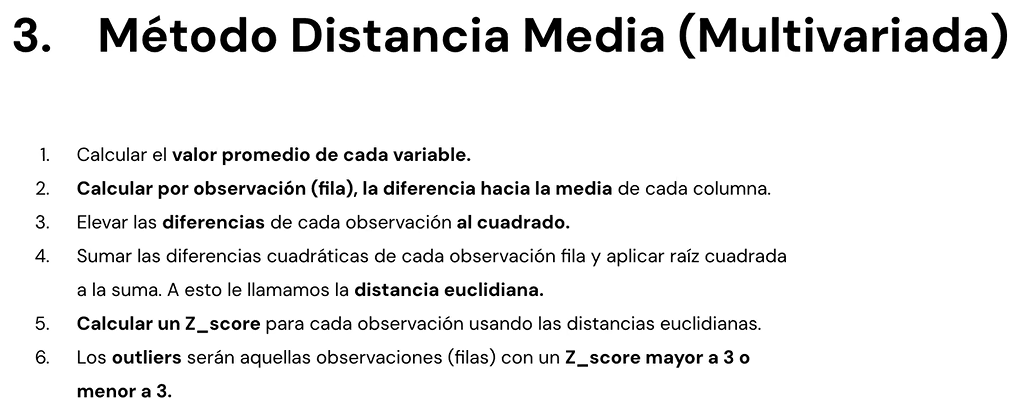

In [ ]:
# Crear una copia del DataFrame sin las columnas especificadas
df1_float = df1.drop(['YEAR', 'DOY', 'DATE', 'Type'], axis=1).copy()

df1_float.head()

,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,T2M_MAX,T2M_MIN,T2M,T2MDEW,T2MWET,RH2M,PRECTOTCORR,QV2M,WS2M,GWETTOP,GWETROOT,GWETPROF,ET0
0,44.06,172.7,-999.0,34.41,32.62,28.27,12.87,20.20,-2.53,8.83,25.19,0.00,3.78,2.45,0.18,0.59,0.59,1.762371
1,44.01,182.1,-999.0,34.99,34.65,28.75,12.35,20.48,-7.53,6.48,16.31,0.00,2.56,2.43,0.17,0.59,0.59,1.625673
2,43.98,178.8,-999.0,34.84,34.59,29.30,13.76,21.43,-3.12,9.15,20.50,0.00,3.54,2.35,0.17,0.59,0.59,1.673867
3,43.93,183.7,-999.0,34.92,34.96,26.73,14.93,20.52,-0.67,9.93,25.81,0.59,4.33,2.40,0.17,0.59,0.59,1.601166
4,43.89,181.0,-999.0,34.63,34.36,28.40,13.46,21.09,-1.24,9.93,24.62,1.51,4.09,2.38,0.25,0.59,0.59,1.665365


In [ ]:
df1_mean = df1_float.mean() # media de los datos_
df1_mean

TOA_SW_DWN             30.522322
ALLSKY_SFC_PAR_TOT     99.933840
CLRSKY_SFC_PAR_TOT   -253.906871
CLRSKY_SFC_SW_DWN      24.084421
ALLSKY_SFC_SW_DWN      19.776209
T2M_MAX                21.571672
T2M_MIN                 8.291357
T2M                    14.233009
T2MDEW                 -2.309521
T2MWET                  5.961773
RH2M                   38.214564
PRECTOTCORR             0.763082
QV2M                    4.072281
WS2M                    1.950477
GWETTOP                 0.457228
GWETROOT                0.643150
GWETPROF                0.639167
ET0                     1.282470
dtype: float64

In [ ]:
dist = np.sqrt(np.sum(((df1_float-df1_mean)**2), axis=1))
dist

0        749.128904
1        750.369769
2        749.911465
3        750.327439
4        750.040722
            ...    
10953    432.434422
10954    435.630680
10955    433.660563
10956    441.052829
10957    437.811522
Length: 10958, dtype: float64

In [ ]:
dist_mean = dist.mean() #media de las distancia
dist_zscore = (dist - dist_mean) / dist.std()#z-score para las distancias

In [ ]:
dist_zscore.describe()

count    1.095800e+04
mean    -4.149912e-17
std      1.000000e+00
min     -1.029973e+00
25%     -8.253833e-01
50%     -4.718679e-01
75%      1.381685e+00
max      1.435936e+00
dtype: float64

In [ ]:
cutoff = 3
df1_float['z_score'] = dist_zscore
df1_float['outlier'] = 0
df1_float.loc[(df1_float.z_score > cutoff) | (df1_float.z_score < -cutoff),'outlier'] = 1

In [ ]:
df1_float.head()

,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,T2M_MAX,T2M_MIN,T2M,T2MDEW,T2MWET,RH2M,PRECTOTCORR,QV2M,WS2M,GWETTOP,GWETROOT,GWETPROF,ET0,z_score,outlier
0,44.06,172.7,-999.0,34.41,32.62,28.27,12.87,20.20,-2.53,8.83,25.19,0.00,3.78,2.45,0.18,0.59,0.59,1.762371,1.400149,0
1,44.01,182.1,-999.0,34.99,34.65,28.75,12.35,20.48,-7.53,6.48,16.31,0.00,2.56,2.43,0.17,0.59,0.59,1.625673,1.407129,0
2,43.98,178.8,-999.0,34.84,34.59,29.30,13.76,21.43,-3.12,9.15,20.50,0.00,3.54,2.35,0.17,0.59,0.59,1.673867,1.404551,0
3,43.93,183.7,-999.0,34.92,34.96,26.73,14.93,20.52,-0.67,9.93,25.81,0.59,4.33,2.40,0.17,0.59,0.59,1.601166,1.406890,0
4,43.89,181.0,-999.0,34.63,34.36,28.40,13.46,21.09,-1.24,9.93,24.62,1.51,4.09,2.38,0.25,0.59,0.59,1.665365,1.405278,0


In [ ]:
df1_float.outlier.sum()

0

**Se determina luego del proceso de análisis que el df1 no posee outliers.**

# Eligiendo un Algoritmo de Regresión o Clasificación

In [ ]:
model1 = 'ET0~T2M_MAX + T2M_MIN + T2M + RH2M + WS2M + TOA_SW_DWN + ALLSKY_SFC_SW_DWN'
lm1 = sm.ols(formula =model1, data = df1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    ET0   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.404e+05
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:18:00   Log-Likelihood:                 18121.
No. Observations:               10958   AIC:                        -3.623e+04
Df Residuals:                   10950   BIC:                        -3.617e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1994      0.00

Se elige una metodología de regresión que permita determinar desde las variables la ET0. Esta metodología, según su valor de Rcuadrado permite explicar el 98,8% de las observaciones. Además, es posible evidenciar que todas las variables salvo la humedad relativa rechazan la hipotesis nula con lo cual es posible calcular la ET0 haciendo uso de esta regresión.

# InSights
